In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns
import scipy
# p_ = primeiro questionário aplicado
# s_ = segundo questionário aplicado
# c_ = compilado dos questionários

p_quiz_prof = pd.read_csv('questionarios/p_questionario_professor.csv')
p_quiz_aluno = pd.read_csv('questionarios/p_questionario_aluno.csv')

s_quiz_prof = pd.read_csv('questionarios/s_questionario_professor.csv')
s_quiz_aluno = pd.read_csv('questionarios/s_questionario_aluno.csv')

c_quiz_prof = pd.read_csv('questionarios/c_questionario_professor.csv')
c_quiz_aluno = pd.read_csv('questionarios/c_questionario_aluno.csv')


questionarios = [p_quiz_prof, p_quiz_aluno, s_quiz_prof, s_quiz_aluno, c_quiz_prof, c_quiz_aluno]

## Checando por inconsistências nas planilhas

In [2]:
len(p_quiz_aluno.columns) == len(p_quiz_prof.columns)

True

In [3]:
len(s_quiz_aluno.columns) == len(s_quiz_prof.columns)

True

In [4]:
len(c_quiz_aluno.columns) == len(c_quiz_prof.columns)

True

## Renomeando as colunas

In [5]:
p_quiz_aluno.columns = ['url', 'interatividade', 'recurso', 'densidade', 'dificuldade', 'visualizacoes', 'curtidas', 'descurtidas', 'favorito', 'comentarios', 'duracao', 'data', 'wordsnotrep', 'totalwords', 'ratio', 'nounsnotrep', 'nounstotal', 'ratio2']
p_quiz_prof.columns = ['url', 'interatividade', 'recurso', 'densidade', 'dificuldade', 'visualizacoes', 'curtidas', 'descurtidas', 'favorito', 'comentarios', 'duracao', 'data', 'wordsnotrep', 'totalwords', 'ratio', 'nounsnotrep', 'nounstotal', 'ratio2']
s_quiz_aluno.columns = ['url', 'interatividade', 'recurso', 'densidade', 'dificuldade', 'visualizacoes', 'curtidas', 'descurtidas', 'favorito', 'comentarios', 'duracao', 'data', 'wordsnotrep', 'totalwords', 'ratio', 'nounsnotrep', 'nounstotal', 'ratio2']
s_quiz_prof.columns = ['url', 'interatividade', 'recurso', 'densidade', 'dificuldade', 'visualizacoes', 'curtidas', 'descurtidas', 'favorito', 'comentarios', 'duracao', 'data', 'wordsnotrep', 'totalwords', 'ratio', 'nounsnotrep', 'nounstotal', 'ratio2']
c_quiz_aluno.columns = ['url', 'interatividade', 'recurso', 'densidade', 'dificuldade', 'visualizacoes', 'curtidas', 'descurtidas', 'favorito', 'comentarios', 'duracao', 'data', 'wordsnotrep', 'totalwords', 'ratio', 'nounsnotrep', 'nounstotal', 'ratio2']
c_quiz_prof.columns = ['url', 'interatividade', 'recurso', 'densidade', 'dificuldade', 'visualizacoes', 'curtidas', 'descurtidas', 'favorito', 'comentarios', 'duracao', 'data', 'wordsnotrep', 'totalwords', 'ratio', 'nounsnotrep', 'nounstotal', 'ratio2']

In [6]:
p_quiz_prof.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=iFYWrDMfVNo,Expositivo,"Apresentação, Demonstração, Exemplo, Introdução",Muito baixo,Fácil,12172,417,8,0,53,441,2015-10-19,299.0,641.0,"0,46646",114.0,147.0,"0,7755"
1,https://www.youtube.com/watch?v=YUeiAhpPMjQ,Misto,"Apresentação, Demonstração, Exemplo",Muito alto,Difícil,361,45,0,0,3,1118,2019-06-10,493.0,1576.0,"0,31282",233.0,483.0,"0,4824"


In [7]:
p_quiz_aluno.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=iFYWrDMfVNo,Expositivo,"Analogia, Demonstração, Exemplo, Problema, Slide",Baixo,Fácil,12172,417,8,0,53,441,2015-10-19,299.0,641.0,"0,46646",114.0,147.0,"0,7755"
1,https://www.youtube.com/watch?v=YUeiAhpPMjQ,Misto,"Analogia, Demonstração, Exemplo, Exercício",Muito alto,Difícil,361,45,0,0,3,1118,2019-06-10,493.0,1576.0,"0,31282",233.0,483.0,"0,4824"


In [8]:
s_quiz_aluno.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=-t_c6F_Uoeg,Expositivo,Apresentação,Muito alto,Fácil,33621,1276,2,0,0,451,2015-05-27,290,710,"0,4085",123,280,"0,4393"
1,https://www.youtube.com/watch?v=1V7tRE0wFZQ,Expositivo,"Diagrama, Slide",Médio,Muito fácil,2192,14,0,0,2,477,2018-11-28,261,603,"0,4328",98,180,"0,5444"


In [9]:
s_quiz_prof.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=-t_c6F_Uoeg,Expositivo,"Definição, Demonstração, Exemplo, Slide",Alto,Médio,33621,1276,2,0,0,451,2015-05-27,290,710,"0,4085",123,280,"0,4393"
1,https://www.youtube.com/watch?v=1V7tRE0wFZQ,Expositivo,"Apresentação, Exemplo, Palestra, Slide, Texto",Médio,Difícil,2192,14,0,0,2,477,2018-11-28,261,603,"0,4328",98,180,"0,5444"


In [10]:
c_quiz_aluno.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=iFYWrDMfVNo,Expositivo,"Analogia, Demonstração, Exemplo, Problema, Slide",Baixo,Fácil,12172,417,8,0,53,441,2015-10-19,299.0,641.0,"0,46646",114.0,147.0,"0,7755"
1,https://www.youtube.com/watch?v=YUeiAhpPMjQ,Misto,"Analogia, Demonstração, Exemplo, Exercício",Muito alto,Difícil,361,45,0,0,3,1118,2019-06-10,493.0,1576.0,"0,31282",233.0,483.0,"0,4824"


In [11]:
c_quiz_prof.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=iFYWrDMfVNo,Expositivo,"Apresentação, Demonstração, Exemplo, Introdução",Muito baixo,Fácil,12172,417,8,0,53,441,2015-10-19,299.0,641.0,"0,46646",114.0,147.0,"0,7755"
1,https://www.youtube.com/watch?v=YUeiAhpPMjQ,Misto,"Apresentação, Demonstração, Exemplo",Muito alto,Difícil,361,45,0,0,3,1118,2019-06-10,493.0,1576.0,"0,31282",233.0,483.0,"0,4824"


## Visualizando as variáveis categóricas dos questionários do professor

### Densidade

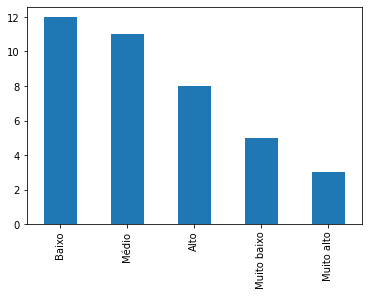

In [12]:
p_quiz_prof['densidade'].value_counts().plot(kind='bar')

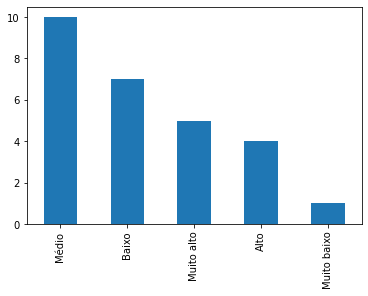

In [13]:
s_quiz_prof['densidade'].value_counts().plot(kind='bar')

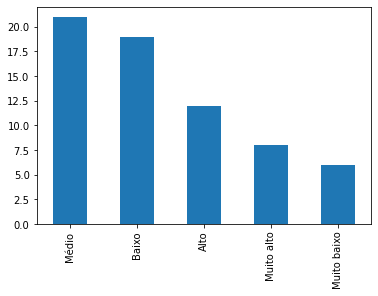

In [14]:
c_quiz_prof['densidade'].value_counts().plot(kind='bar')

### Dificuldade

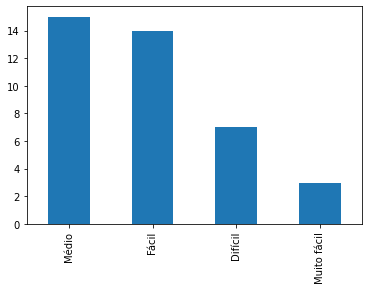

In [15]:
p_quiz_prof['dificuldade'].value_counts().plot(kind='bar')

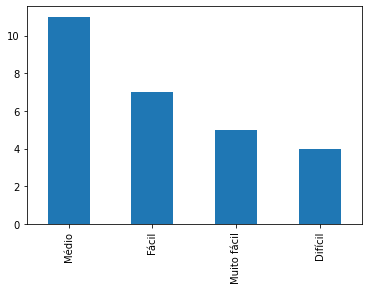

In [16]:
s_quiz_prof['dificuldade'].value_counts().plot(kind='bar')

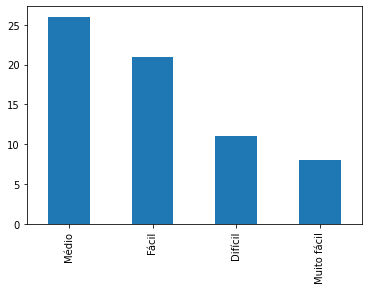

In [17]:
c_quiz_prof['dificuldade'].value_counts().plot(kind='bar')

## Visualizando as variáveis categóricas dos questionários do aluno

### Densidade

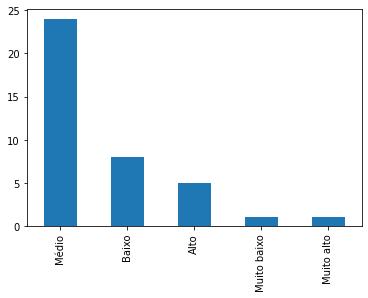

In [18]:
p_quiz_aluno['densidade'].value_counts().plot(kind='bar')

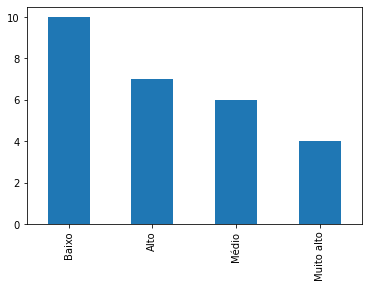

In [19]:
s_quiz_aluno['densidade'].value_counts().plot(kind='bar')

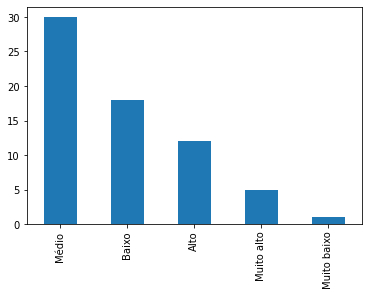

In [20]:
c_quiz_aluno['densidade'].value_counts().plot(kind='bar')

### Dificuldade

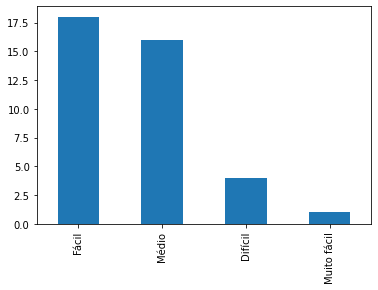

In [21]:
p_quiz_aluno['dificuldade'].value_counts().plot(kind='bar')

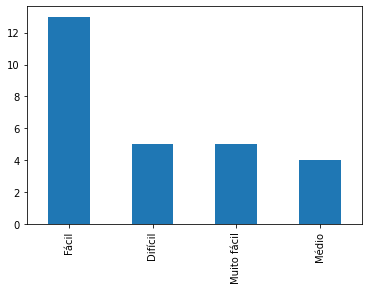

In [22]:
s_quiz_aluno['dificuldade'].value_counts().plot(kind='bar')

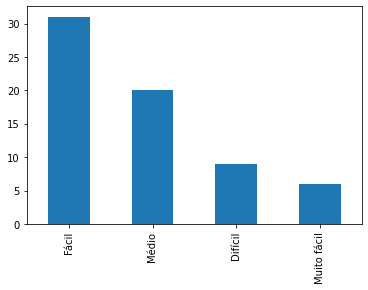

In [23]:
c_quiz_aluno['dificuldade'].value_counts().plot(kind='bar')

## Atribuindo valores numéricos as variáveis categóricas

In [24]:
dicionario = {'interatividade': {'Expositivo': 0, 'Misto': 1},
             'densidade': {'Muito baixo': 0, 'Baixo': 1, 'Médio': 2, 'Alto': 3,  'Muito alto': 4},
               'dificuldade': {'Muito fácil': 0, 'Fácil': 1, 'Médio': 2, 'Difícil': 3}}
def converte_col_numeros(questionarios):
    for questionario in questionarios:
        questionario.replace(dicionario, inplace=True)
        
converte_col_numeros(questionarios)

## Checando por NaN

In [25]:
def checa(questionarios):
    for questionario in questionarios:
        print(questionario.info())
checa(questionarios)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             39 non-null     object 
 1   interatividade  39 non-null     int64  
 2   recurso         39 non-null     object 
 3   densidade       39 non-null     int64  
 4   dificuldade     39 non-null     int64  
 5   visualizacoes   39 non-null     int64  
 6   curtidas        39 non-null     int64  
 7   descurtidas     39 non-null     int64  
 8   favorito        39 non-null     int64  
 9   comentarios     39 non-null     int64  
 10  duracao         39 non-null     int64  
 11  data            39 non-null     object 
 12  wordsnotrep     34 non-null     float64
 13  totalwords      34 non-null     float64
 14  ratio           39 non-null     object 
 15  nounsnotrep     34 non-null     float64
 16  nounstotal      34 non-null     float64
 17  ratio2          39 non-null     objec

### Removendo as linhas contendo NaN

In [26]:
p_quiz_prof.dropna(axis=0, inplace=True)
p_quiz_aluno.dropna(axis=0, inplace=True)
c_quiz_prof.dropna(axis=0, inplace=True)
c_quiz_aluno.dropna(axis=0, inplace=True)

In [27]:
checa(questionarios)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 38
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             34 non-null     object 
 1   interatividade  34 non-null     int64  
 2   recurso         34 non-null     object 
 3   densidade       34 non-null     int64  
 4   dificuldade     34 non-null     int64  
 5   visualizacoes   34 non-null     int64  
 6   curtidas        34 non-null     int64  
 7   descurtidas     34 non-null     int64  
 8   favorito        34 non-null     int64  
 9   comentarios     34 non-null     int64  
 10  duracao         34 non-null     int64  
 11  data            34 non-null     object 
 12  wordsnotrep     34 non-null     float64
 13  totalwords      34 non-null     float64
 14  ratio           34 non-null     object 
 15  nounsnotrep     34 non-null     float64
 16  nounstotal      34 non-null     float64
 17  ratio2          34 non-null     objec

### Convertendo a data

In [28]:
d1 = date(2020, 7, 2)

def date_to_days(data):
    data_nova = datetime.date(datetime.strptime(data, '%Y-%m-%d'))
    delta = d1 - data_nova
    return delta.days

In [29]:
def converte(questionarios):
    for questionario in questionarios:
        for idx, row in enumerate(questionario['data']):
            questionario['data'].iloc[idx] = date_to_days(row)
        questionario['data'] = questionario['data'].astype('int64')
            
converte(questionarios)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
p_quiz_prof.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=iFYWrDMfVNo,0,"Apresentação, Demonstração, Exemplo, Introdução",0,1,12172,417,8,0,53,441,1718,299.0,641.0,"0,46646",114.0,147.0,"0,7755"
1,https://www.youtube.com/watch?v=YUeiAhpPMjQ,1,"Apresentação, Demonstração, Exemplo",4,3,361,45,0,0,3,1118,388,493.0,1576.0,"0,31282",233.0,483.0,"0,4824"


In [31]:
s_quiz_prof.head(2)

,url,interatividade,recurso,densidade,dificuldade,visualizacoes,curtidas,descurtidas,favorito,comentarios,duracao,data,wordsnotrep,totalwords,ratio,nounsnotrep,nounstotal,ratio2
0,https://www.youtube.com/watch?v=-t_c6F_Uoeg,0,"Definição, Demonstração, Exemplo, Slide",3,2,33621,1276,2,0,0,451,1863,290,710,"0,4085",123,280,"0,4393"
1,https://www.youtube.com/watch?v=1V7tRE0wFZQ,0,"Apresentação, Exemplo, Palestra, Slide, Texto",2,3,2192,14,0,0,2,477,582,261,603,"0,4328",98,180,"0,5444"


## Normalizando os dados em relação à data

In [32]:
def normaliza(questionarios, *args):
    for questionario in questionarios:
        for col in args:
            questionario[col] = questionario[col] / questionario['data']
            questionario[col] = pd.to_numeric(questionario[col])
normaliza(questionarios, 'visualizacoes', 'curtidas', 'descurtidas', 'comentarios')

## Convertendo os ratios para float

In [33]:
def ratios_to_float(questionarios):
    for questionario in questionarios:
        questionario['ratio'] = questionario['wordsnotrep'] / questionario['totalwords']
        questionario['ratio2'] = questionario['nounsnotrep'] / questionario['nounstotal']
ratios_to_float(questionarios)

## Removendo as colunas da quantidade de palavras e favorito (inteiramente 0)

In [34]:
c_quiz_prof.drop(['favorito', 'wordsnotrep', 'totalwords', 'nounsnotrep', 'nounstotal'], axis=1, inplace=True)
c_quiz_aluno.drop(['favorito', 'wordsnotrep', 'totalwords', 'nounsnotrep', 'nounstotal'], axis=1, inplace=True)

# Verificando as correlações:  Professores

In [35]:
def corr(questionario, colunas, coluna):
    formato = '{:34} {:10}     p-value {:10}'
    for i in range(len(colunas)):
        string = colunas[i] + ' e ' + coluna + ':'
        ans = scipy.stats.pearsonr(questionario[colunas[i]], questionario[coluna]) 
        print(formato.format(string, ans[0], ans[1]))

### Todas as colunas x densidade

#### Primeiro questionário

In [36]:
corr(p_quiz_prof, ['dificuldade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'densidade')

dificuldade e densidade:           0.39918434594133223     p-value 0.019349621709694998
curtidas e densidade:              -0.1728013663335626     p-value 0.3284276614060615
descurtidas e densidade:           -0.23483239892139546     p-value 0.18126761386213416
visualizacoes e densidade:         -0.3173225313334638     p-value 0.06744917610374244
comentarios e densidade:           -0.0421701832204171     p-value 0.8128118930603557
duracao e densidade:               0.5310342710621438     p-value 0.0012323095010486748
data e densidade:                  -0.2875461391607914     p-value 0.09914997021045009
ratio e densidade:                 -0.3950784317450404     p-value 0.02075074864210952
ratio2 e densidade:                -0.31652770878769754     p-value 0.06817667880324971


#### Segundo questionário

In [37]:
corr(s_quiz_prof, ['dificuldade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'densidade')

dificuldade e densidade:           0.5650951518027669     p-value 0.0021313826346960655
curtidas e densidade:              -0.07212372089209092     p-value 0.7207186185157726
descurtidas e densidade:           -0.09022427520304159     p-value 0.6544780554041434
visualizacoes e densidade:         -0.06870547775613488     p-value 0.7334695528960936
comentarios e densidade:           -0.054307867411579266     p-value 0.7879008964834167
duracao e densidade:               -0.03718203897772676     p-value 0.8539156081789986
data e densidade:                  0.13773562328537392     p-value 0.493277014455753
ratio e densidade:                 0.040533874772658234     p-value 0.8409049415235267
ratio2 e densidade:                -0.07877570504458978     p-value 0.6961154741890438


#### Compilado

In [38]:
corr(c_quiz_prof, ['dificuldade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'densidade')

dificuldade e densidade:           0.45594836198528704     p-value 0.00022184279559226227
curtidas e densidade:              -0.15387581872623698     p-value 0.23640793374620195
descurtidas e densidade:           -0.2082190832490687     p-value 0.10733157108937157
visualizacoes e densidade:         -0.23183756260556979     p-value 0.07220372736596198
comentarios e densidade:           -0.0688358699824917     p-value 0.5981040304768195
duracao e densidade:               0.27474338491189515     p-value 0.03212549204259286
data e densidade:                  -0.10255604763798983     p-value 0.43157776652598195
ratio e densidade:                 -0.21068640532979596     p-value 0.1031389187013711
ratio2 e densidade:                -0.24640370593768493     p-value 0.05558300721456312


### Todas as colunas x dificuldade

#### Primeiro questionário

In [39]:
corr(p_quiz_prof, ['densidade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'dificuldade')

densidade e dificuldade:           0.39918434594133223     p-value 0.019349621709694998
curtidas e dificuldade:            -0.16538608523514195     p-value 0.34991909634935947
descurtidas e dificuldade:         -0.24002706490757936     p-value 0.17152451800455068
visualizacoes e dificuldade:       -0.15646799541201564     p-value 0.37686253216987275
comentarios e dificuldade:         -0.19033032207878414     p-value 0.28094927483713705
duracao e dificuldade:             0.062088429455223824     p-value 0.727217064781719
data e dificuldade:                0.19813059598033064     p-value 0.2613282929799859
ratio e dificuldade:               0.13722445268776273     p-value 0.4389947155700537
ratio2 e dificuldade:              0.0259991627384361     p-value 0.8839578131270025


#### Segundo questionário

In [40]:
corr(s_quiz_prof, ['densidade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'dificuldade')

densidade e dificuldade:           0.5650951518027669     p-value 0.0021313826346960655
curtidas e dificuldade:            -0.3120429698553244     p-value 0.11306681840416352
descurtidas e dificuldade:         -0.2724765639916798     p-value 0.1691264508872894
visualizacoes e dificuldade:       -0.257797190573574     p-value 0.19420417514216287
comentarios e dificuldade:         -0.31426658755704906     p-value 0.11038677688994766
duracao e dificuldade:             -0.1904340269939163     p-value 0.34137745265033287
data e dificuldade:                -0.1650586097853839     p-value 0.4106492559679478
ratio e dificuldade:               0.20200585976374458     p-value 0.3122792442440719
ratio2 e dificuldade:              0.26480990153002565     p-value 0.18192269218229692


#### Compilado

In [41]:
corr(c_quiz_prof, ['densidade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'dificuldade')

densidade e dificuldade:           0.45594836198528704     p-value 0.00022184279559226227
curtidas e dificuldade:            -0.21313890324577808     p-value 0.09909831188794863
descurtidas e dificuldade:         -0.2263917044341006     p-value 0.07935281752252536
visualizacoes e dificuldade:       -0.18775670634758512     p-value 0.1473343910736863
comentarios e dificuldade:         -0.19861690309828048     p-value 0.12490964691589809
duracao e dificuldade:             -0.062853445499457     p-value 0.6303589430142755
data e dificuldade:                0.028642133414055526     p-value 0.8265571865514544
ratio e dificuldade:               0.1704346470528535     p-value 0.1891052483949022
ratio2 e dificuldade:              0.12076658468136628     p-value 0.35387290331001203


# Verificando as correlações:  Alunos

### Todas as colunas x densidade

#### Primeiro questionário

In [42]:
corr(p_quiz_aluno, ['dificuldade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'densidade')

dificuldade e densidade:           0.7411960832008249     p-value 5.335731060642856e-07
curtidas e densidade:              -0.0076022630335601665     p-value 0.9659638772058868
descurtidas e densidade:           -0.0955964590270575     p-value 0.5907131846930379
visualizacoes e densidade:         -0.12388864004653591     p-value 0.4851366816254507
comentarios e densidade:           0.0010042738228673211     p-value 0.9955024849099804
duracao e densidade:               0.5771339593144851     p-value 0.00035245260411065907
data e densidade:                  -0.25490948382004397     p-value 0.14568901849942606
ratio e densidade:                 -0.5068740829485776     p-value 0.002219081088050509
ratio2 e densidade:                -0.45598412225034507     p-value 0.006722441441496408


#### Segundo questionário

In [43]:
corr(s_quiz_aluno, ['dificuldade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'densidade')

dificuldade e densidade:           0.32320125516660425     p-value 0.1000912672784829
curtidas e densidade:              -0.15862961188805827     p-value 0.4293620865162157
descurtidas e densidade:           -0.062150815606007284     p-value 0.7581115655683547
visualizacoes e densidade:         -0.11207527701038134     p-value 0.5778266179668202
comentarios e densidade:           -0.2242414872505364     p-value 0.2608215450108566
duracao e densidade:               0.04885733364469965     p-value 0.8087789021209586
data e densidade:                  -0.06561931250658419     p-value 0.7450414422087068
ratio e densidade:                 -0.14243049104015149     p-value 0.4785129583152416
ratio2 e densidade:                -0.4588253409165596     p-value 0.016072915601010613


#### Compilado

In [44]:
corr(c_quiz_aluno, ['dificuldade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'densidade')

dificuldade e densidade:           0.45219036917326155     p-value 0.0002536715334758827
curtidas e densidade:              -0.09888958816926924     p-value 0.4483100682793304
descurtidas e densidade:           -0.09690108570299849     p-value 0.45753279578662825
visualizacoes e densidade:         -0.12878166347710474     p-value 0.3225969377782557
comentarios e densidade:           -0.0907060215802282     p-value 0.4869200702163333
duracao e densidade:               0.2684296404832007     p-value 0.03646653246975494
data e densidade:                  -0.14454701539458933     p-value 0.26637817211804954
ratio e densidade:                 -0.29828435886210225     p-value 0.01954831880699484
ratio2 e densidade:                -0.4281086524165232     p-value 0.0005779232406358685


### Todas as colunas x dificuldade

#### Primeiro questionário

In [45]:
corr(p_quiz_aluno, ['densidade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'dificuldade')

densidade e dificuldade:           0.7411960832008249     p-value 5.335731060642856e-07
curtidas e dificuldade:            -0.2835285451195614     p-value 0.10417416385855384
descurtidas e dificuldade:         -0.38729746610171667     p-value 0.02363710109189686
visualizacoes e dificuldade:       -0.3309355624674172     p-value 0.05590811101838829
comentarios e dificuldade:         -0.21450091581863115     p-value 0.22314719695194388
duracao e dificuldade:             0.367858461025212     p-value 0.032320452851617984
data e dificuldade:                -0.09688629464949539     p-value 0.5856893419675254
ratio e dificuldade:               -0.3616970856987579     p-value 0.035561558027941954
ratio2 e dificuldade:              -0.38966705982203753     p-value 0.022724981549075478


#### Segundo questionário

In [46]:
corr(s_quiz_aluno, ['densidade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'dificuldade')

densidade e dificuldade:           0.32320125516660425     p-value 0.1000912672784829
curtidas e dificuldade:            -0.06163720766003428     p-value 0.7600525869931402
descurtidas e dificuldade:         0.04756714326348684     p-value 0.8137402405362446
visualizacoes e dificuldade:       -0.05522529511964827     p-value 0.784400338831611
comentarios e dificuldade:         -0.07181692683025243     p-value 0.7218601250422936
duracao e dificuldade:             0.296584479185183     p-value 0.13304283361699215
data e dificuldade:                -0.05155720469262363     p-value 0.7984202600975293
ratio e dificuldade:               -0.3073086814618305     p-value 0.1189326545256503
ratio2 e dificuldade:              -0.38885862478549493     p-value 0.04500108342509333


#### Compilado

In [47]:
corr(c_quiz_aluno, ['densidade', 'curtidas', 'descurtidas', 'visualizacoes', 'comentarios', 'duracao', 'data', 'ratio', 'ratio2'], 'dificuldade')

densidade e dificuldade:           0.45219036917326155     p-value 0.0002536715334758827
curtidas e dificuldade:            -0.1429817059526712     p-value 0.27164595140949466
descurtidas e dificuldade:         -0.1320416976460826     p-value 0.3103949087180644
visualizacoes e dificuldade:       -0.15781381144867268     p-value 0.22448237336137106
comentarios e dificuldade:         -0.11859421453015034     p-value 0.3626609126523763
duracao e dificuldade:             0.31882704883920565     p-value 0.012268200680802302
data e dificuldade:                -0.07136734666531559     p-value 0.5846788649708324
ratio e dificuldade:               -0.3180922189529577     p-value 0.012481078771296502
ratio2 e dificuldade:              -0.3435887706902855     p-value 0.006706627077200855


# Visualizando

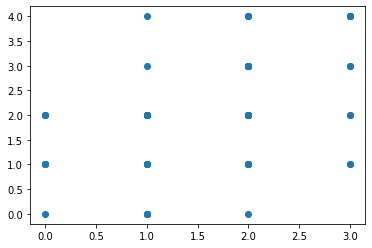

In [48]:
plt.scatter(c_quiz_prof['dificuldade'], c_quiz_prof['densidade'])

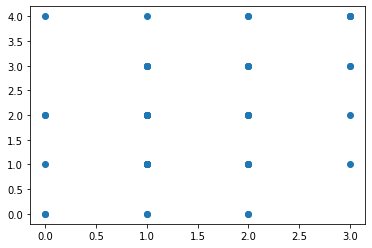

In [49]:
plt.scatter(c_quiz_aluno['dificuldade'], c_quiz_prof['densidade'])

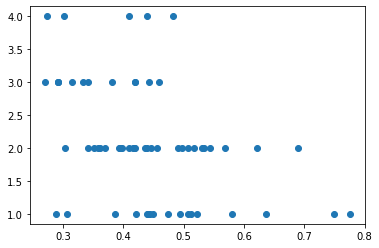

In [50]:
plt.scatter(c_quiz_aluno['ratio2'], c_quiz_aluno['densidade'])

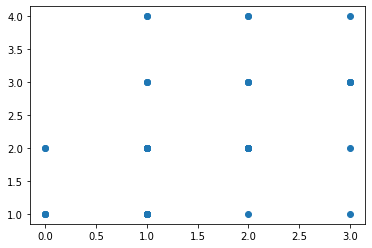

In [51]:
plt.scatter(c_quiz_aluno['dificuldade'], c_quiz_aluno['densidade'])

In [52]:
def regressao(questionario, col1, col2):
    X = questionario[col1].values.reshape(-1, 1)
    Y = questionario[col2].values.reshape(-1, 1)

    plt.scatter(X, Y)

    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    num = 0
    den = 0
    for i in range(len(X)):
        num += (X[i] - X_mean)*(Y[i] - Y_mean)
        den += (X[i] - X_mean)**2
    m = num / den

    c = Y_mean - m*X_mean

  
    Y_pred = m*X + c

    plt.scatter(X, Y) # actual
    plt.plot(X, Y_pred, color='red')
    plt.show()

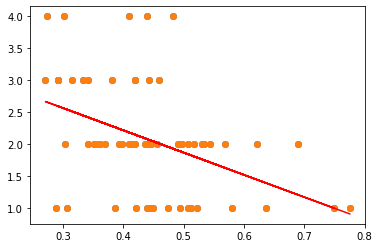

In [53]:
regressao(c_quiz_aluno, 'ratio2', 'densidade')

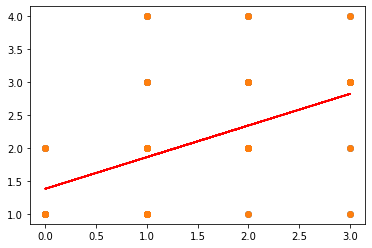

In [54]:
regressao(c_quiz_aluno, 'dificuldade', 'densidade')

## Plotando heatmap da correlação

In [55]:
c_quiz_aluno.rename(columns={'ratio': 'ratio1'}, inplace=True)
c_quiz_prof.rename(columns={'ratio': 'ratio1'}, inplace=True)

In [56]:
corr = c_quiz_prof.corr()

res = scipy.stats.pearsonr(c_quiz_prof['densidade'], c_quiz_prof['dificuldade'])
print('Correlation: ' + str(res[0]))
print('P-value: ' + str(res[1]))
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Correlation: 0.45594836198528704
P-value: 0.00022184279559226227


,interatividade,densidade,dificuldade,visualizacoes,curtidas,descurtidas,comentarios,duracao,data,ratio1,ratio2
interatividade,1.00,0.20,0.27,-0.13,-0.11,-0.10,-0.07,0.07,-0.17,0.04,0.04
densidade,0.20,1.00,0.46,-0.23,-0.15,-0.21,-0.07,0.27,-0.10,-0.21,-0.25
dificuldade,0.27,0.46,1.00,-0.19,-0.21,-0.23,-0.20,-0.06,0.03,0.17,0.12
visualizacoes,-0.13,-0.23,-0.19,1.00,0.93,0.80,0.63,0.19,0.37,-0.22,-0.10
curtidas,-0.11,-0.15,-0.21,0.93,1.00,0.73,0.74,0.33,0.18,-0.28,-0.11
descurtidas,-0.10,-0.21,-0.23,0.80,0.73,1.00,0.67,0.17,0.21,-0.23,-0.02
comentarios,-0.07,-0.07,-0.20,0.63,0.74,0.67,1.00,0.18,-0.07,-0.14,0.04
duracao,0.07,0.27,-0.06,0.19,0.33,0.17,0.18,1.00,-0.21,-0.84,-0.51
data,-0.17,-0.10,0.03,0.37,0.18,0.21,-0.07,-0.21,1.00,0.12,-0.01
ratio1,0.04,-0.21,0.17,-0.22,-0.28,-0.23,-0.14,-0.84,0.12,1.00,0.72


In [57]:
corr = c_quiz_aluno.corr()

corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,interatividade,densidade,dificuldade,visualizacoes,curtidas,descurtidas,comentarios,duracao,data,ratio1,ratio2
interatividade,1.00,0.11,-0.02,0.10,0.18,0.25,0.38,0.07,-0.25,-0.03,0.16
densidade,0.11,1.00,0.45,-0.13,-0.10,-0.10,-0.09,0.27,-0.14,-0.30,-0.43
dificuldade,-0.02,0.45,1.00,-0.16,-0.14,-0.13,-0.12,0.32,-0.07,-0.32,-0.34
visualizacoes,0.10,-0.13,-0.16,1.00,0.93,0.80,0.63,0.19,0.37,-0.22,-0.10
curtidas,0.18,-0.10,-0.14,0.93,1.00,0.73,0.74,0.33,0.18,-0.28,-0.11
descurtidas,0.25,-0.10,-0.13,0.80,0.73,1.00,0.67,0.17,0.21,-0.23,-0.02
comentarios,0.38,-0.09,-0.12,0.63,0.74,0.67,1.00,0.18,-0.07,-0.14,0.04
duracao,0.07,0.27,0.32,0.19,0.33,0.17,0.18,1.00,-0.21,-0.84,-0.51
data,-0.25,-0.14,-0.07,0.37,0.18,0.21,-0.07,-0.21,1.00,0.12,-0.01
ratio1,-0.03,-0.30,-0.32,-0.22,-0.28,-0.23,-0.14,-0.84,0.12,1.00,0.72


In [58]:
c_quiz_prof.iloc[1]


url               https://www.youtube.com/watch?v=YUeiAhpPMjQ
interatividade                                              1
recurso                   Apresentação, Demonstração, Exemplo
densidade                                                   4
dificuldade                                                 3
visualizacoes                                        0.930412
curtidas                                             0.115979
descurtidas                                                 0
comentarios                                        0.00773196
duracao                                                  1118
data                                                      388
ratio1                                               0.312817
ratio2                                               0.482402
Name: 1, dtype: object

# Tentando lidar com os tipos de recurso de aprendizagem

In [59]:
mapeamento = {'Analogia': 0, 
              'Apresentação': 1,
              'Avaliação': 2,
              'Declaração': 3,
              'Definição': 4,
              'Demonstração': 5,
              'Diagrama': 6,
              'Exemplo': 7, 
              'Exercício': 8,
              'Experiência': 9,
              'Introdução': 10,
              'Narrativa': 11,
              'Palestra': 12,
              'Problema': 13,
              'Prova': 14,
              'Questionário': 15,
              'Resumo': 16,
              'Simulação': 17,
              'Slide': 18,
              'Tabela': 19,
              'Texto': 20,
              'Visão Geral': 21}
colunas_nomes = ['recurso'+str(numero) for numero in range(21)]


In [60]:
def colunas_local(string):
    """
        Retorna um vetor dos recursos presentes na coluna. Por exemplo, se a coluna
        possuir 'Demonstração, Introdução', a função retornará [5, 10], de acordo 
        com o map mapeamento.
    """
    return [mapeamento[item] for item in string.split(', ')]
            

In [61]:
def get_one_recursos(questionario):
    """
        Gera uma matriz com 22 colunas, em que a i,j célula é 1 se a 
        j-ésimo recurso de aprendizagem foi identificado no i-ésimo registro
    """
    recursos = questionario.loc[:, 'recurso']

    matriz = []
    for row in recursos:
        recursos_linha = colunas_local(row)

        res = []
        for idx in range(22):
            if idx not in recursos_linha:
                res.append(0)
            else:
                res.append(1)
        matriz.append(res)
    return matriz

In [62]:
def gera_colunas(questionario):
    matriz = get_one_recursos(questionario)

    matriz = np.array(matriz).T
    
    for column in range(22):
        questionario.insert(column+3, 'recurso'+str(column), matriz[column])
        

In [63]:
gera_colunas(c_quiz_prof)
gera_colunas(c_quiz_aluno)

In [64]:
def plota_barras(questionario):
    marcados = []
    for i in range(22):
        m = questionario.iloc[:, i+3].sum(axis=0)
        marcados.append(m)

    dicionario = {}
    for name, idx in mapeamento.items():
        dicionario[name] = marcados[idx]
    data = pd.DataFrame([dicionario])


    data.plot.bar(figsize=(10, 8), title='Distribuição dos Recursos de Aprendizagem')


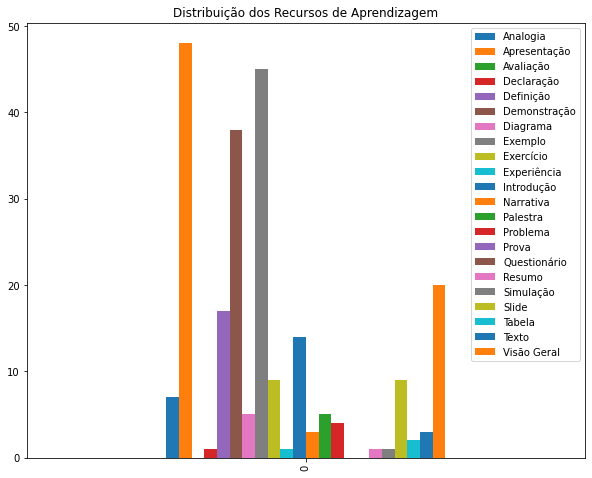

In [65]:
plota_barras(c_quiz_prof)

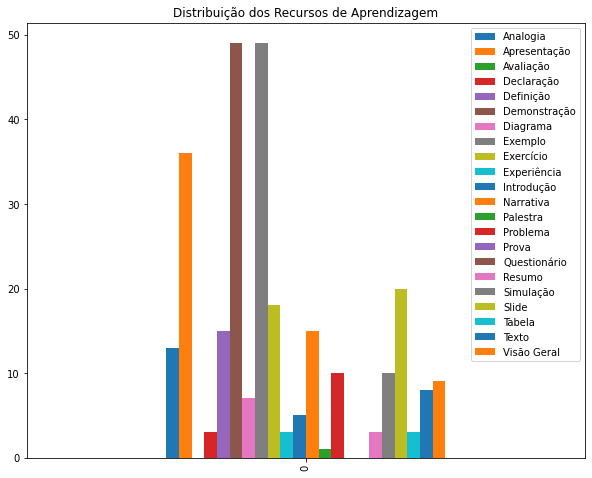

In [66]:
plota_barras(c_quiz_aluno)